In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 9.3 MB/s eta 0:00:00a 0:00:01


In [4]:
! pip install neattext --upgrade
import neattext.functions as nfx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.6 MB/s eta 0:00:00


In [6]:
#reading data from remote link
data_set = "data/emotion_dataset_2.csv"
df = pd.read_csv(data_set)



In [7]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [8]:
df.shape

(34792, 4)

In [9]:
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [10]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [11]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: >

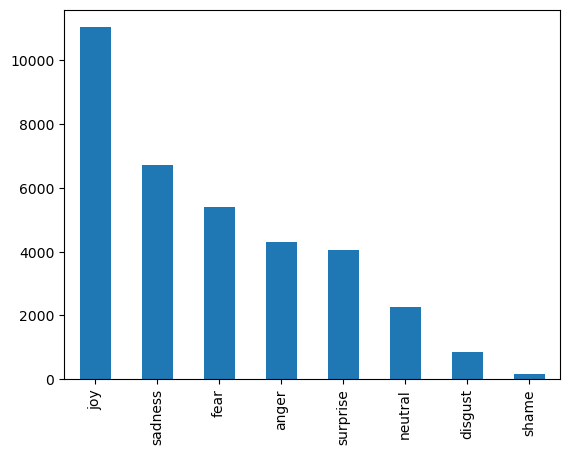

In [12]:
df['Emotion'].value_counts().plot(kind = 'bar')

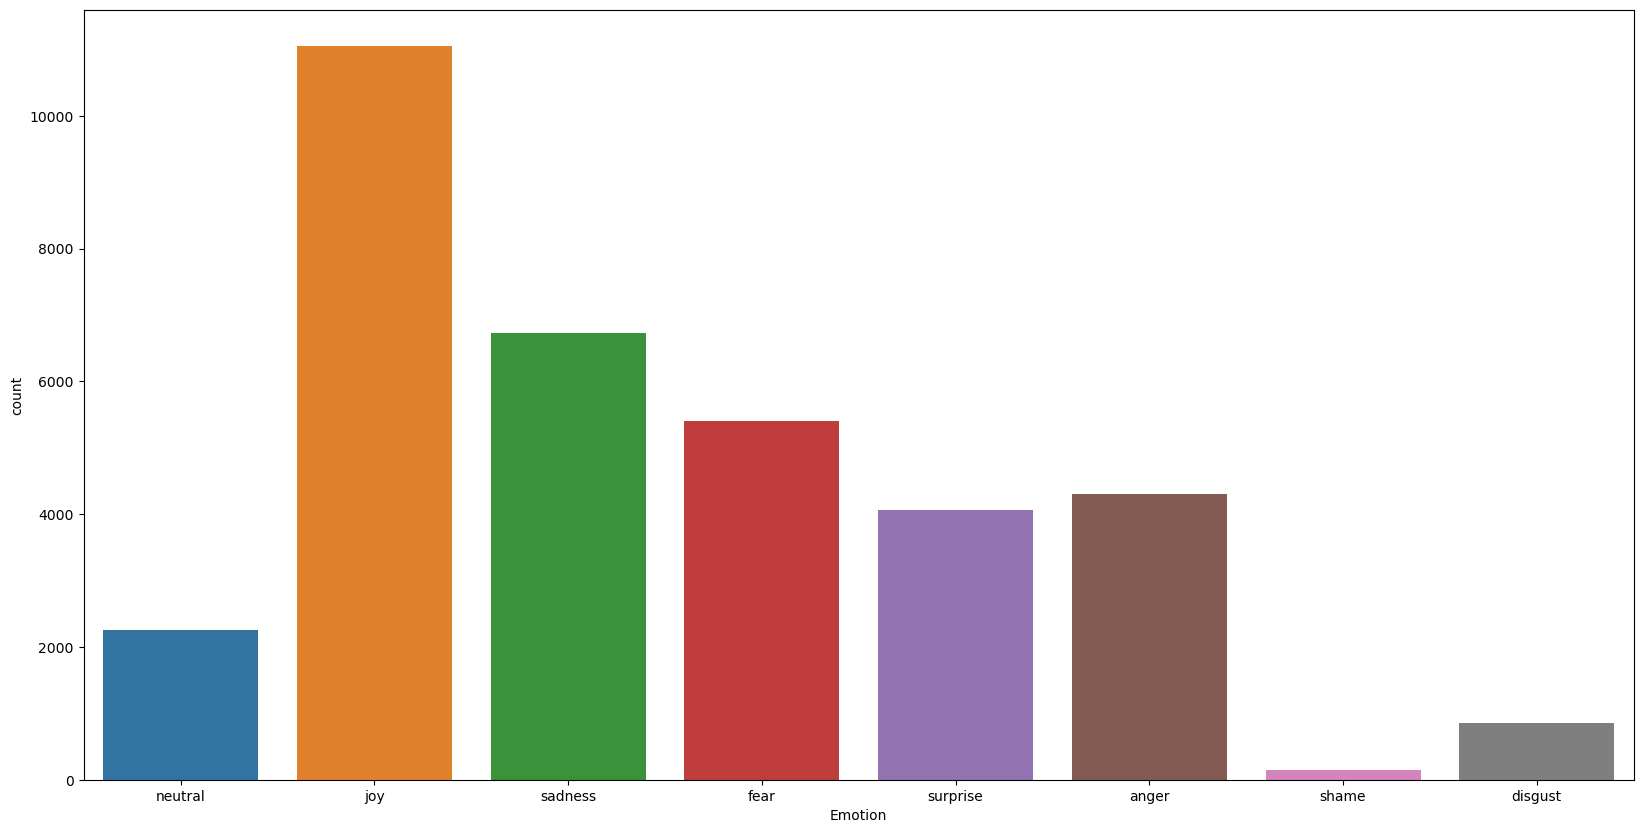

In [13]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'Emotion',data = df)
plt.show()

In [14]:
from textblob import TextBlob

In [15]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = 'Positive'
  elif sentiment < 0:
    result = 'Negative'
  else:
    result = 'Neutral'
  return result
  



In [16]:
get_sentiment("I love coding")

'Positive'

In [17]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [18]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [19]:
#compare emotion vs sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

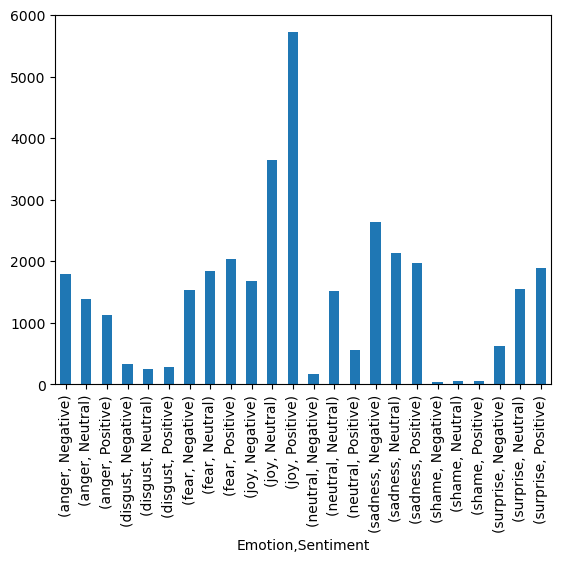

In [20]:
#first method: using matplotlib
# compare our emotion vs sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind = 'bar')

In [21]:
#using seaborn
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind='strip', native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)>

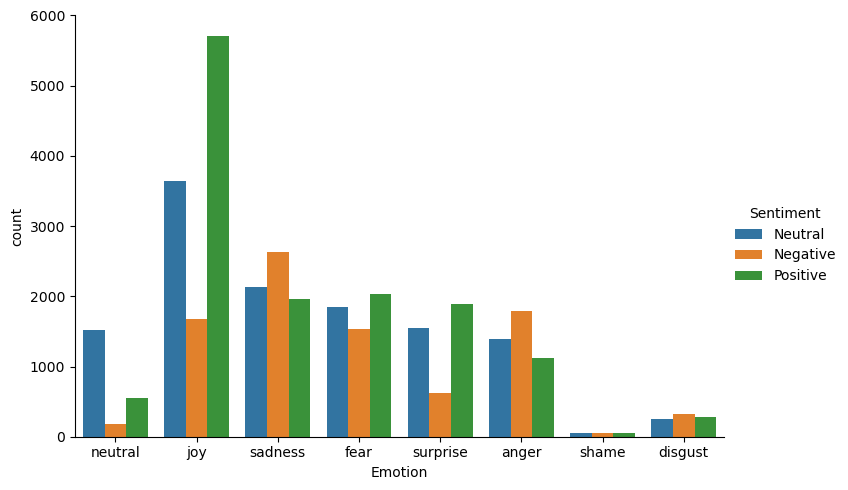

In [22]:
sns.catplot(x = 'Emotion',hue='Sentiment',data = df,kind = 'count',aspect=1.5 )

**Text Cleaning**



---


*   Remove Noise
    

    1. stop words
    2. special characters
    3. emojis
    4. punctuations 

    









In [23]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [24]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)
df[['Text','Clean_Text'] ]


,Text,Clean_Text
0,Why ?,Why
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe hugggzzz for u babe ...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,@MichelGW have you gift Hope you like it Its h...
34788,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,A man robbed me today .,A man robbed me today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of #Losing YOU


**Key word extraction**: extraxting the most commonest keywords

---



In [25]:
from collections import Counter

In [26]:
def extract_keywords(text,num=50):
  tokens = [ tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)


In [27]:
#list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [28]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [29]:
#joy document
joy_docx = ' '.join(joy_list)


In [30]:
joy_docx

'Sage Act upgrade on my to do list for tommorow  Such an eye  The true hazel eyeand so brilliant  Regular features  open countenance  with a complexion  Oh  What a bloom of full health  and such a pretty height and size  such a firm and upright figure  There is health  not merely in her bloom  but in her air  her head  her glance  One hears sometimes of a child being  the picture of health   now  she always gives me the idea of being the complete picture of grownup health  She is loveliness itself   @Iluvmiasantos ugh babe hugggzzz for u   babe naamazed nga ako e babe e despite negas mas pinaramdam at fil ko ang  For once in his life  Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition   I have a feeling i will fail french #fuckfrench  GoodLet  s go now   When I fell in love with \\X\\  Overnight I felt confidence selfesteem    responsible and worthwhile One could get terribly ecstatic but that would be a dangerous thin

In [31]:
#extract keywords
keyword_joy = extract_keywords(joy_docx)

In [32]:
keyword_joy

{'the': 5300,
 'to': 4744,
 'I': 4471,
 'a': 3595,
 'and': 3221,
 'of': 2803,
 'my': 2793,
 'in': 2329,
 'for': 1999,
 'is': 1590,
 'with': 1375,
 'you': 1282,
 'that': 1234,
 'was': 1155,
 'me': 1144,
 'at': 1124,
 'on': 1120,
 'it': 1012,
 'have': 962,
 'be': 890,
 'this': 784,
 'day': 729,
 'amp': 678,
 'up': 658,
 'had': 639,
 'all': 636,
 'so': 603,
 'time': 601,
 'Im': 555,
 'when': 544,
 'your': 528,
 'When': 520,
 'The': 516,
 'work': 509,
 'from': 481,
 'not': 480,
 'get': 479,
 'like': 476,
 'an': 473,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'out': 453,
 'just': 452,
 'about': 450,
 'now': 442,
 'are': 438,
 'but': 402,
 'love': 393,
 'i': 387}

In [33]:
#plot
def plot_most_common_words(mydict):
  df_01 = pd.DataFrame(mydict.items(),columns = ['token','count'])
  plt.figure(figsize = (20,10))
  sns.barplot(x = 'token',y = 'count',data=df_01)
  plt.xticks(rotation=45)
  plt.show()

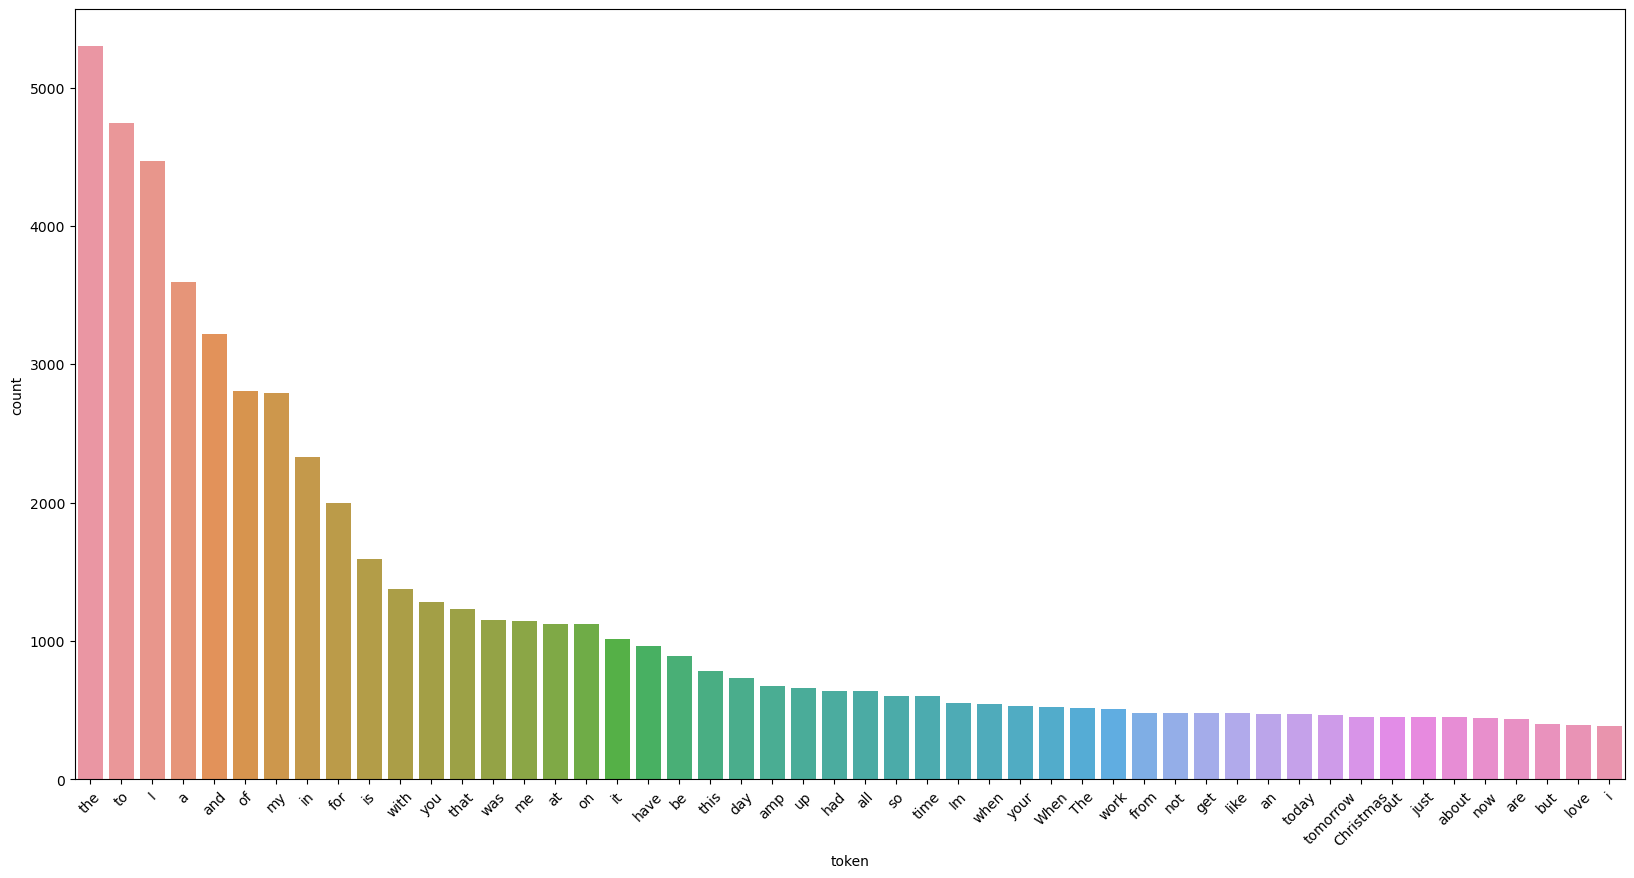

In [34]:
plot_most_common_words(keyword_joy)

In [35]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

In [36]:
import wordcloud

In [37]:
def plot_wordcloud(docx):
  mywordcloud = wordcloud.WorldCloud().generate(docx)
  plt.figure(figsize = (20,10))
  plt.imshow(mywordcloud,interpolation= 'bilinear')
  plt.axis('off')
  plt.show()




In [38]:
#load ml packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  MultinomialNB

#vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
#split our dataset
from sklearn.model_selection import train_test_split

In [39]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [40]:
Xfeatures

0                                                    Why  
1           Sage Act upgrade on my to do list for tommorow
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3         Such an eye  The true hazel eyeand so brillia...
4        @Iluvmiasantos ugh babe hugggzzz for u   babe ...
                               ...                        
34787    @MichelGW have you gift Hope you like it Its h...
34788    The world didnt give it to meso the world MOST...
34789                              A man robbed me today  
34790       Youu call it JEALOUSY I call it of #Losing YOU
34791    I think about you baby and I dream about you a...
Name: Clean_Text, Length: 34792, dtype: object

In [41]:
cv = CountVectorizer() 
X = cv.fit_transform(Xfeatures)

In [42]:
#split dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [43]:
#building model
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)


MultinomialNB()

In [44]:
y_pred_for_nv = nv_model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
s=accuracy_score(y_test,y_pred_for_nv)
print(s)

0.5637095228971067


In [47]:
sample_text = ["I hate you"]

In [48]:
vect = cv.transform(sample_text).toarray()
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
nv_model.predict(vect)

array(['anger'], dtype='<U8')

In [50]:
#check for prediction probability percentile
nv_model.predict_proba(vect)

array([[3.28584114e-01, 1.37195510e-02, 1.47631308e-01, 1.90730400e-01,
        3.46977085e-03, 2.64318628e-01, 3.13856227e-05, 5.15148424e-02]])

In [51]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [52]:
np.max(nv_model.predict_proba(vect))

0.32858411428380846

In [53]:
def predict_emotion(sample_text,model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
  print(prediction[0])
  return pred_percentage_for_all


In [54]:
predict_emotion(sample_text,nv_model)

anger


{'anger': 0.32858411428380846,
 'disgust': 0.013719550953727618,
 'fear': 0.14763130808694586,
 'joy': 0.1907303996025054,
 'neutral': 0.0034697708474193192,
 'sadness': 0.2643186281678986,
 'shame': 3.138562266513996e-05,
 'surprise': 0.05151484243502955}

In [55]:
predict_emotion(["i hate you"],nv_model)

anger


{'anger': 0.32858411428380846,
 'disgust': 0.013719550953727618,
 'fear': 0.14763130808694586,
 'joy': 0.1907303996025054,
 'neutral': 0.0034697708474193192,
 'sadness': 0.2643186281678986,
 'shame': 3.138562266513996e-05,
 'surprise': 0.05151484243502955}

In [56]:
###Model evaluation
print(classification_report(y_test,y_pred_for_nv))

C:\Users\ravinder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.65      0.48      0.55      1283
     disgust       0.43      0.02      0.04       292
        fear       0.74      0.57      0.65      1645
         joy       0.51      0.88      0.65      3311
     neutral       0.75      0.10      0.17       675
     sadness       0.54      0.53      0.54      2015
       shame       0.00      0.00      0.00        36
    surprise       0.59      0.24      0.34      1181

    accuracy                           0.56     10438
   macro avg       0.53      0.35      0.37     10438
weighted avg       0.59      0.56      0.53     10438



C:\Users\ravinder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ravinder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 612,    0,   61,  396,    1,  203,    0,   10],
       [  32,    6,   27,  152,    0,   69,    0,    6],
       [  73,    2,  938,  380,    5,  172,    0,   75],
       [  56,    2,   99, 2903,    6,  178,    0,   67],
       [  27,    0,   17,  437,   65,  123,    0,    6],
       [  85,    0,   61,  752,    6, 1077,    0,   34],
       [   9,    0,    7,   12,    0,    8,    0,    0],
       [  52,    4,   52,  638,    4,  148,    0,  283]], dtype=int64)

In [58]:
import joblib 


In [59]:
import joblib
model_file = open("data/emotion_classifier.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

f=open('data/vector.pkl','wb')
joblib.dump(cv,f)
f.close()